### Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
df=pd.read_csv(r"E:\Datascience\Data set\Customer Purchasing Behaviors.csv")



### Printing first 20 Rows

In [2]:
print(df.head(20))

    user_id  age  annual_income  purchase_amount  loyalty_score region  \
0         1   25          45000              200            4.5  North   
1         2   34          55000              350            7.0  South   
2         3   45          65000              500            8.0   West   
3         4   22          30000              150            3.0   East   
4         5   29          47000              220            4.8  North   
5         6   41          61000              480            7.8  South   
6         7   36          54000              400            6.5   West   
7         8   27          43000              230            4.2   East   
8         9   50          70000              600            9.0  North   
9        10   31          50000              320            5.5  South   
10       11   28          46000              250            4.4   West   
11       12   42          62000              520            8.2  North   
12       13   33          53000       

### Data Cleaning

In [3]:
df = pd.read_csv(r"E:\Datascience\Data set\Customer Purchasing Behaviors.csv")
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dropna(inplace=True)
numeric_column = 'numeric_column'
if numeric_column in df.columns:
    df[numeric_column].fillna(df[numeric_column].mean(), inplace=True)
categorical_column = 'categorical_column'
if categorical_column in df.columns:
    df[categorical_column].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)
df.isna().sum()
df.info()

(238, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 14.9+ KB


### Searching for Duplicates

In [4]:
print(df.duplicated().sum())

0


### Statistical Analysis

          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  
    user_id  age  annual_in

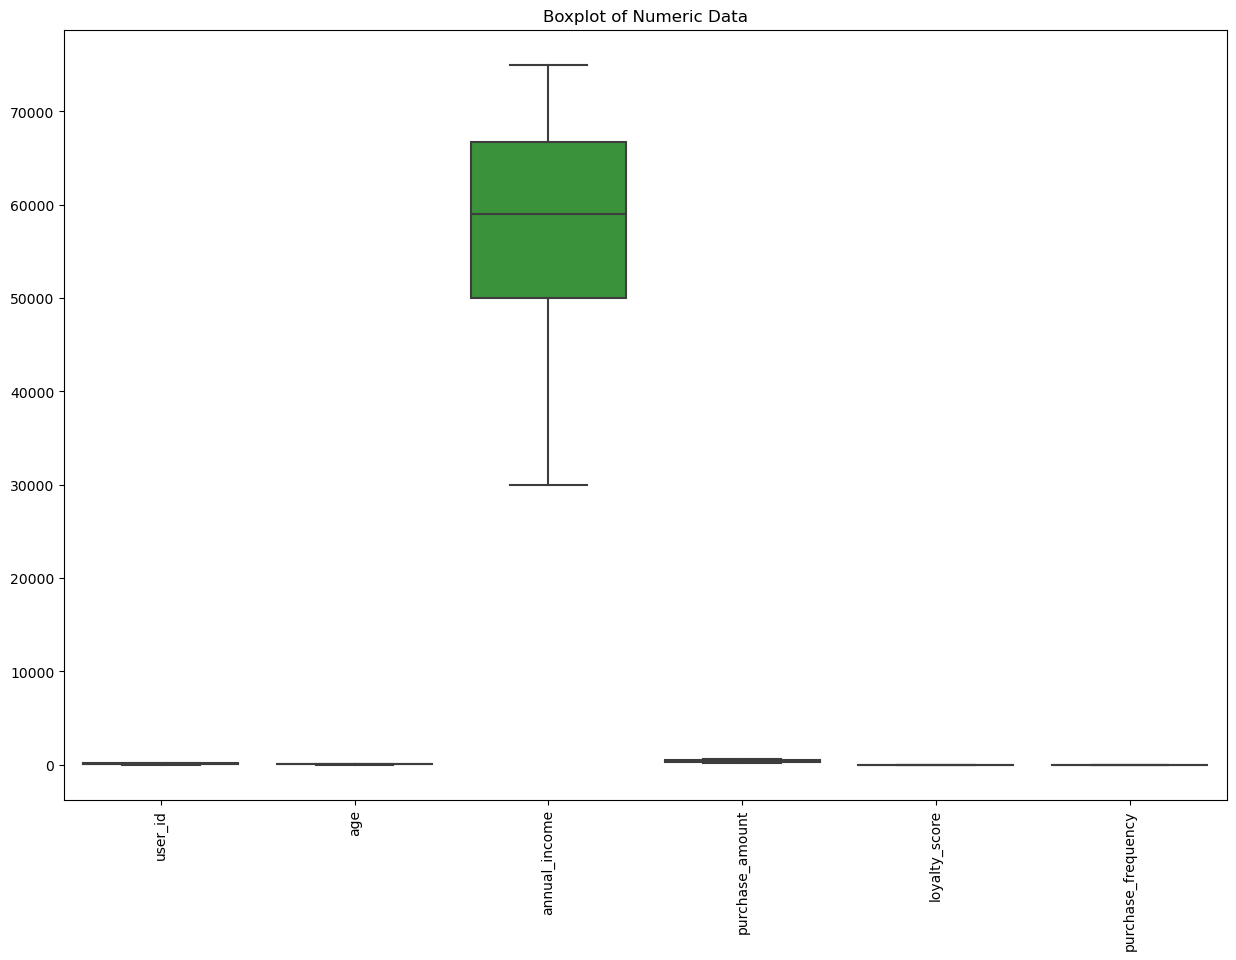

In [5]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
stat_an=numeric_data.describe()
print(stat_an)
print(df.head(20))
print(df.tail())
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Numeric Data')
plt.xticks(rotation=90)  
plt.show()

### Correaltion

                     user_id       age  annual_income  purchase_amount  \
user_id             1.000000  0.067061       0.059031         0.080621   
age                 0.067061  1.000000       0.974833         0.986140   
annual_income       0.059031  0.974833       1.000000         0.984208   
purchase_amount     0.080621  0.986140       0.984208         1.000000   
loyalty_score       0.060819  0.981835       0.984351         0.994147   
purchase_frequency  0.070541  0.980532       0.982920         0.993579   

                    loyalty_score  purchase_frequency  
user_id                  0.060819            0.070541  
age                      0.981835            0.980532  
annual_income            0.984351            0.982920  
purchase_amount          0.994147            0.993579  
loyalty_score            1.000000            0.986990  
purchase_frequency       0.986990            1.000000  


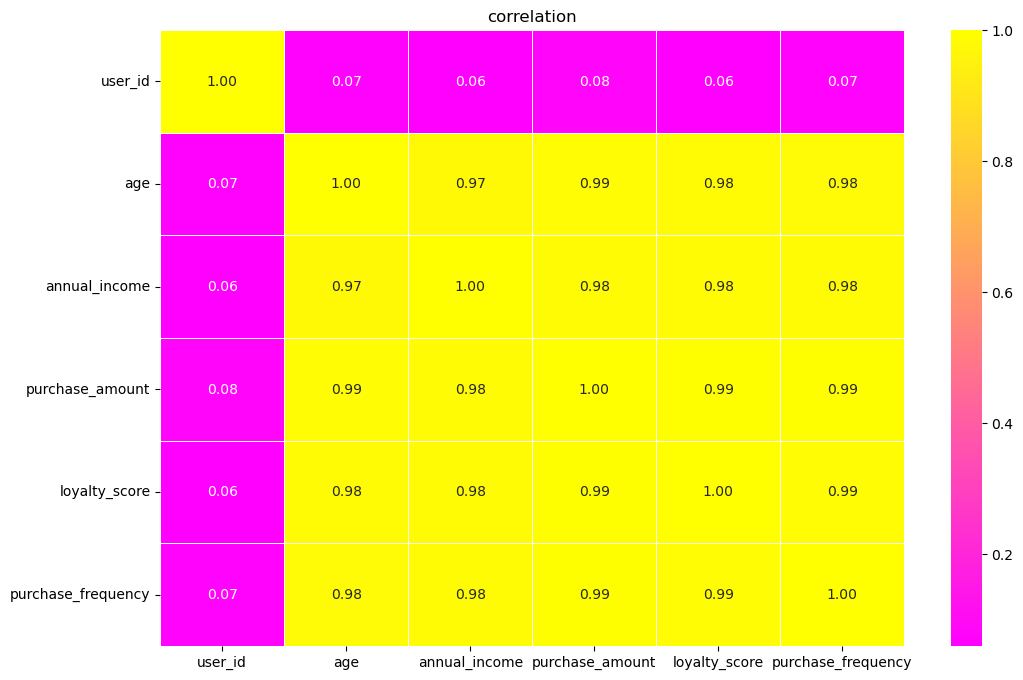

In [11]:
corelation=numeric_data.corr()
print(corelation)
plt.figure(figsize=(12,8))
sns.heatmap(corelation,cmap='spring',annot=True,fmt='.2f',linewidths=0.5)
plt.title("correlation")
plt.show()


### Ploting graph against Dependent and Independent Variable

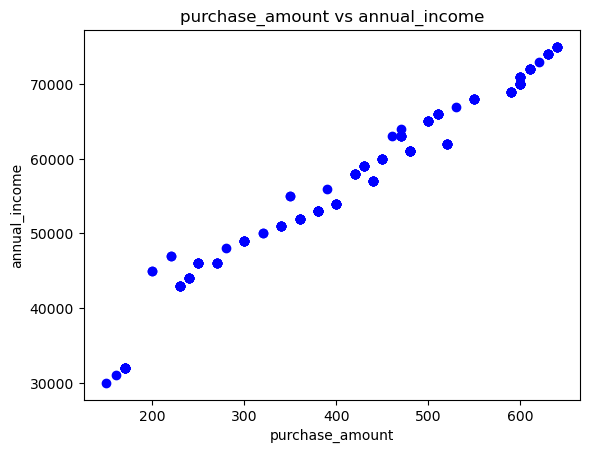

In [7]:
plt.scatter(df['purchase_amount'],df['annual_income'],color='blue')
plt.title('purchase_amount vs annual_income')
plt.xlabel('purchase_amount')
plt.ylabel('annual_income')
plt.show()

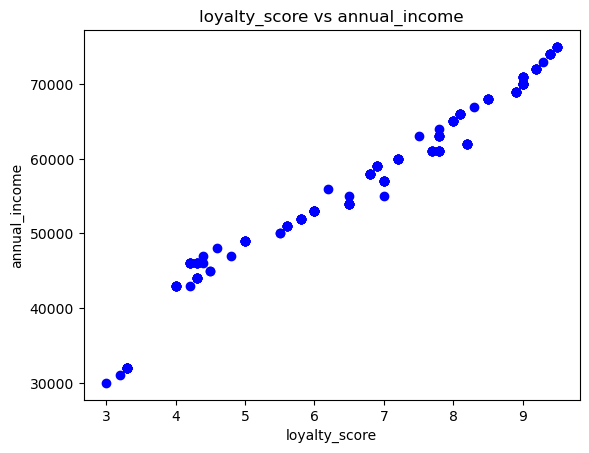

In [8]:
plt.scatter(df['loyalty_score'],df['annual_income'],color='blue')
plt.title('loyalty_score vs annual_income')
plt.xlabel('loyalty_score')
plt.ylabel('annual_income')
plt.show()

### Model Building and Prediction

In [9]:
import warnings 
warnings.filterwarnings("ignore", category=UserWarning)
x=df[['loyalty_score','purchase_amount']]
y=df[['annual_income']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")
new_data = pd.DataFrame({
    'loyalty_score': [3, 8],
    'purchase_amount': [200, 600],
}) 
processed_data = np.array(new_data)
prediction = regressor.predict(processed_data)
print("predicted annual income", prediction)



Mean Absolute Error: 1802.4538080848076
Mean Squared Error: 5445066.633069751
Root Mean Squared Error: 2333.466655658433
r2 socre is  96.50615098849458 %
predicted annual income [[36793.93957855]
 [67471.47942618]]


### Plot against actual vs predicted

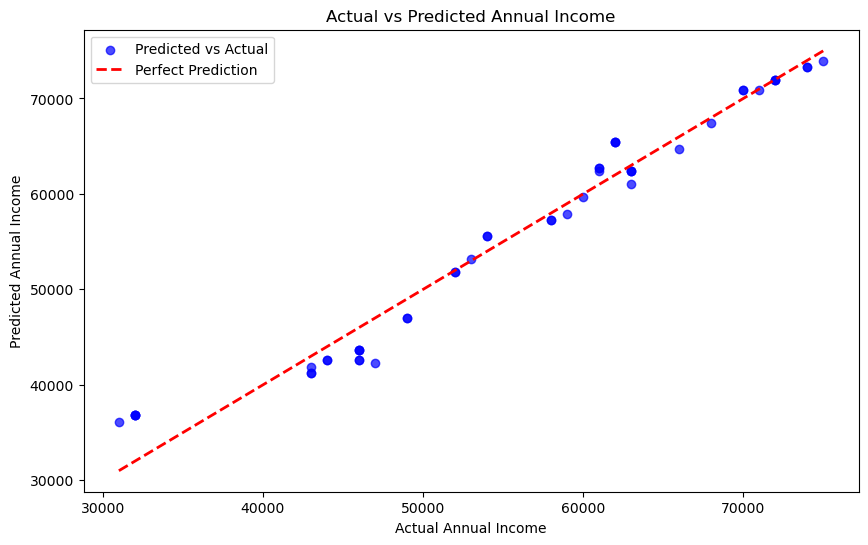

In [10]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)

# Reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Annual Income')
plt.ylabel('Predicted Annual Income')
plt.title('Actual vs Predicted Annual Income')
plt.legend()

# Show plot
plt.show()